In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ModelSoups-boxplot/vitb16/all-combisoup-results.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ModelSoups-boxplot/vitl32/all-combisoup-results.csv')
df = df.drop(df.iloc[:, 0:1], axis=1).mul(100)

In [ ]:
# Create seperate df per category
# Column idexes for each category are calculated using the Binomial Coefficient.

df_cat2 = df.iloc[:, 0:28].transpose().reset_index(drop = True)
df_cat3 = df.iloc[:, -219:-163].transpose().reset_index(drop = True)
df_cat4 = df.iloc[:, -163:-93].transpose().reset_index(drop = True)
df_cat5 = df.iloc[:, -93:-37].transpose().reset_index(drop = True)
df_cat6 = df.iloc[:, -37:-9].transpose().reset_index(drop = True)
df_cat7 = df.iloc[:, -9:-1].transpose().reset_index(drop = True)
df_cat8 = df.iloc[:, -1].transpose().reset_index(drop = True)

In [ ]:
# Verify dataframe shapes
print(df.shape[-1] == df_cat2.shape[0]+df_cat3.shape[0]+df_cat4.shape[0]+df_cat5.shape[0]+df_cat6.shape[0]+df_cat7.shape[0]+df_cat8.shape[0])

(28, 1)
(56, 1)
(70, 1)
(56, 1)
(28, 1)
(8, 1)
(1,)
True


In [ ]:
# Combine dataframes
frames = [df_cat2, df_cat3, df_cat4, df_cat5, df_cat6, df_cat7]
df_data = pd.concat(frames, axis=1)
df_data.columns = [i for i in range(2,8)] #Rename columns

In [ ]:
df_data

,2,3,4,5,6,7
0,93.961864,78.495763,79.131356,67.055085,82.203390,72.457627
1,91.949153,77.860169,87.182203,82.838983,64.194915,59.427966
2,87.500000,80.508475,76.694915,72.987288,77.542373,67.055085
3,80.720339,90.995763,89.936441,89.618644,64.724576,76.906780
4,85.805085,67.584746,83.580508,79.872881,59.851695,65.466102
...,...,...,...,...,...,...
65,NaN,NaN,72.351695,NaN,NaN,NaN
66,NaN,NaN,86.334746,NaN,NaN,NaN
67,NaN,NaN,85.275424,NaN,NaN,NaN
68,NaN,NaN,77.966102,NaN,NaN,NaN


# Create boxplot

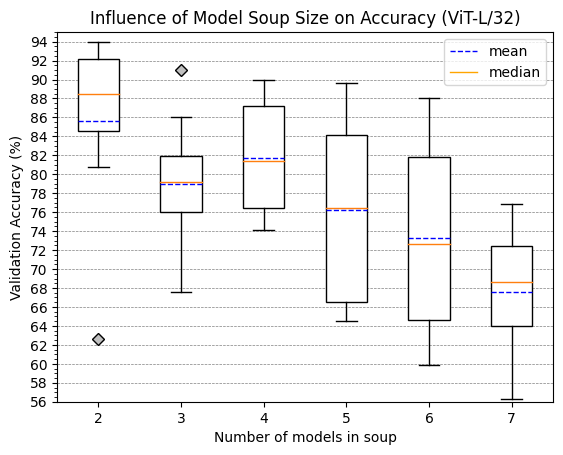

In [ ]:
outlier_config = dict(markerfacecolor='silver', marker='D')

# Plot
bp = plt.boxplot(df_data.dropna().values,
                 showmeans = True,
                 meanline = True,
                 showfliers = True,
                 labels=list(df_data),
                 zorder=10,
                 patch_artist=True,
                 meanprops = dict(color = "b"),
                 flierprops = outlier_config)

for patch in bp['boxes']:
  patch.set_facecolor('white')
plt.title('Influence of Model Soup Size on Accuracy (ViT-L/32)')
plt.ylabel('Validation Accuracy (%)')
plt.xlabel('Number of models in soup')
plt.yticks(np.arange(50, 96, step=2))
plt.ylim(top=95)
plt.ylim(bottom=56)
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.plot([], [], linestyle='dashed', linewidth=1, color='b', label='mean')
plt.plot([], [], '-', linewidth=1, color='orange', label='median')
plt.grid(color='gray', axis ='y', linestyle='dashed', linewidth=0.5, zorder=0)
plt.legend(loc='upper right')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/ModelSoups-boxplot/modelsoups-boxplot-l32.png', dpi = 400, bbox_inches='tight')
plt.show()